In [7]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.wine.Wine_Quality_Data import get_wine_dataset
import common_grid_search_analysis

import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import pickle

from sklearn import svm
from sklearn.model_selection import ShuffleSplit

PLOT_PREFIX = "Figures/WINE_SVM_PLOT_"
GLOBAL_FIG_COUNTER = 0

GS_FILE_NAME_PREFIX = "Analysis_Data/WINE_SVM_DATA"

In [3]:
import NeuralNetworks.common_NN as common_NN
X_train, X_test, y_train, y_test = get_wine_dataset()
num_features = X_train.shape[1]

In [4]:
import TrainingCurves
train_sizes, train_scores, test_scores, fit_times = TrainingCurves.perform_learning_curve(MLPClassifier(), X_train, y_train, "balanced_accuracy")

/home/richard/.virtualenvs/ml/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/richard/.virtualenvs/ml/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/richard/.virtualenvs/ml/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/richard/.virtualenvs/ml/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/richar

/home/richard/.virtualenvs/ml/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/richard/.virtualenvs/ml/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/richard/.virtualenvs/ml/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/richard/.virtualenvs/ml/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/richar

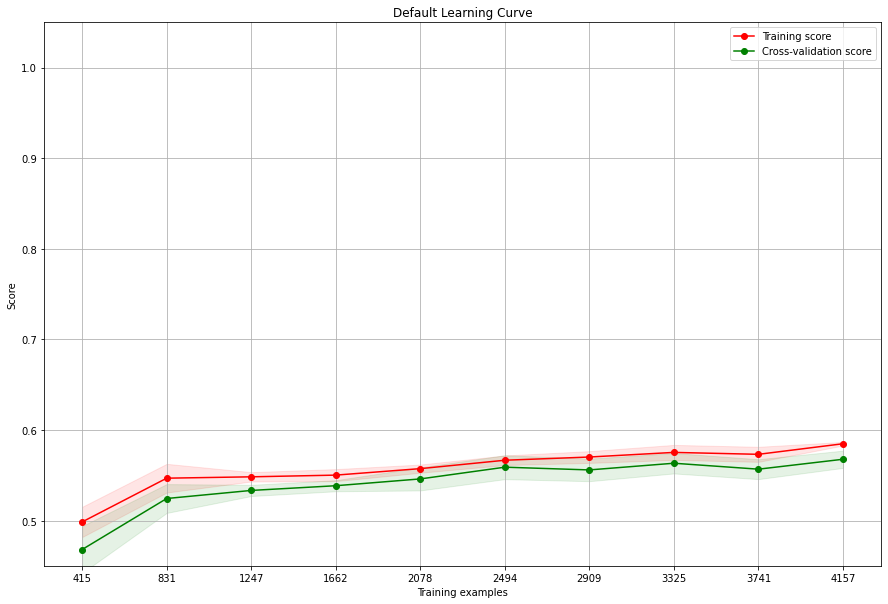

In [5]:
ylim=(0.45, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, "Default Learning Curve", ylim=ylim)

In [ ]:
num_nodes_per_layer = [i for i in range(1, 502, 100)]
num_hidden_layers = [i for i in range(1, 12, 2)]

hidden_layer_sizes = []
for num_nodes in num_nodes_per_layer:
    for num_layers in num_hidden_layers:
        tmp_hl = []
        for i in range(num_layers):
            tmp_hl.append(num_nodes)
        hidden_layer_sizes.append(tmp_hl)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = TrainingCurves.perform_validation_curve(MLPClassifier(), X_train, y_train, 'hidden_layer_sizes', hidden_layer_sizes, 'balanced_accuracy', cv=TrainingCurves.get_cv())

with open('temp_val_scores.pickle', 'wb') as handle:
    pickle.dump((train_scores_mean, train_scores_std, test_scores_mean, test_scores_std), handle, protocol=pickle.HIGHEST_PROTOCOL)

TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "hidden_layer_sizes", hidden_layer_sizes, title="Validation Curve", scoring="balanced_accuracy", tick_spacing=5)



In [ ]:
learning_rate=['adaptive', 'constant']
learning_rate_init=[0.00001, 0.0001, 0.001, .01, 0.1]
max_iter=[100, 200, 300, 500, 1000]
batch_size=[16, 32, 64, 256, 1024, 2056]

parameters = {"learning_rate": learning_rate, 'learning_rate_init': learning_rate_init, 'max_iter': max_iter, 'batch_size': batch_size}

gs = common_NN.perform_grid_search(parameters, X_train, y_train, scoring='balanced_accuracy', GS_FILE_NAME_PREFIX=GS_FILE_NAME_PREFIX)

gs_results = gs

In [ ]:
common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_PREFIX)

In [ ]:
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_PREFIX)

